# Modele analizy danych

Tomasz Rodak

---

## 1.1 Trening w uczeniu maszynowym

Trening (uczenie, optymalizacja) w uczeniu maszynowym to proces, podczas którego model wyznacza swoje parametry w oparciu o dostępne dane. Proces ten może być jednorazowy (gdy istnieje wzór na parametry) lub stopniowy, polegający na iteracyjnym dostosowywaniu parametrów.

W przypadku iteracyjnym istotą treningu jest ocena modelu. Do oceny wykorzystuje się funkcję zwaną funkcją **straty** lub **kosztu** pokazującą jak bardzo przewidywania modelu odbiegają od rzeczywistych wartości (kóre w uczeniu nadzorowanym są nam znane). Funkcja ta ma różną postać w zależności od tego z jakim problemem mamy do czynienia:
* błąd średniokwadratowy (MSE) w przypadku regresji,
* entropia krzyżowa w przypadku klasyfikacji,
* funkcja wiarygodności w rożnych modelach probabilistycznych.

Trening w postaci iteracyjnej wygląda zwykle następująco:
1. inicjalizacja modelu z losowymi parametrami,
2. obliczenie wartości funkcji straty na zbiorze testowym,
3. sprawdzenie,
   * czy parametry modelu przestały się istotnie zmieniać (optymalizacja zbieżna), lub
   * czy nie przekroczono limitu iteracji (brak zbieżności).
   
   Jeśli tak, to proces jest przerywany.
4. dostosowanie parametrów,
5. powrót do punktu 2.

Powstaje pytanie w jaki sposób dostosować parametry modelu w punkcie 4? Funkcja straty może być rozpatrywana jako funkcja przekształcająca parametry modelu w wartość oceny na zbiorze testowym. Zatem poszukiwany jest taki układ parametrów, dla którego funkcja straty obliczana na zbiorze testowym osiąga minimum. Dostosowanie parametrów w punkcie 4 może zatem polegać na podmianie bieżącego układu parametrów na taki układ, który wypada bliżej lokalnego minimum funkcji straty. **Algorytm gradientu prostego** (i wielu jego odmian) opiera się na obserwacji, że kierunek przemieszczania się w przestrzeni parametrów w rejon minimum lokalnego wyznacza ujemny **gradient** funkcji straty.

Celem tego arkusza jest wizualna demonstracja działania algorytmu gradientu prostego na prostych przykładach funkcji rzeczywistych.

## 1.2 Algorytm gradientu prostego

Załóżmy, że mamy daną funkcję rzeczywistą $y=f(x)$, $x\in\mathbb{R}^p$. Chcemy znaleźć jej minimum lokalne. Algorytm gradientu prostego wygląda następująco:

1. Ustalamy parametry algorytmu:
   * $x_0$ - punkt startowy (dowolny),
   * $\eta>0$ - współczynnik uczenia (dowolny, ale nie za duży),
2. Obliczamy kolejne punkty $x_1,x_2,\ldots$ w następujący sposób:
   * $x_{n+1} = x_n - \eta \cdot \nabla f(x_n)$, gdzie $\nabla f(x_n)$ to gradient funkcji $f$ w punkcie $x_n$.
3. Proces kończymy, gdy osiągniemy zbieżność, czyli gdy różnice między kolejnymi punktami staną się zaniedbywalnie małe, lub gdy osiągniemy maksymalną liczbę iteracji.
4. Zwracamy ostatni punkt $x_n$ jako przybliżenie minimum lokalnego funkcji $f$.

Dlaczego to działa? Otóż gradient $f$ w punkcie $x$ wskazuje kierunek, w którym funkcja $f$ **najszybciej rośnie**. Kierunek przeciwny, to kierunek, w którym funkcja $f$ najszybciej maleje. Dlatego przemieszczenie się w kierunku przeciwnym do wskazywanego przez gradient powinno prowadzić do (jakiegoś) minimum lokalnego funkcji $f$ i to jest powód, dla którego do bieżącej wartości $x_n$ dodajemy

\begin{equation*}
-\eta \cdot f'(x_n)
\end{equation*}

## 1.3 Przypadek funkcji jednej zmiennej

Załóżmy, że $y=f(x)$ jest funkcją jednej zmiennej $x$. W tym przypadku algorytm redukuje się do postaci:

1. Ustalamy parametry algorytmu:
   * $x_0$ - punkt startowy (dowolny),
   * $\eta>0$ - współczynnik uczenia (dowolny, ale nie za duży),
2. Obliczamy kolejne punkty $x_1,x_2,\ldots$ w następujący sposób:
   * $x_{n+1} = x_n - \eta \cdot f'(x_n)$, gdzie $f'(x_n)$ to pochodna funkcji $f$ w punkcie $x_n$.
3. Proces kończymy, gdy osiągniemy zbieżność, czyli gdy różnice między kolejnymi punktami staną się zaniedbywalnie małe, lub gdy osiągniemy maksymalną liczbę iteracji.
4. Zwracamy ostatni punkt $x_n$ jako przybliżenie minimum lokalnego funkcji $f$.

### 1.3.1 Przykład dla wybranej funkcji jednej zmiennej

Na początek wybierz jakąś prostą dobrze znaną funkcję, np. $f(x) = x^2$. Później możesz ją dowolnie zmieniać.

Zdefiniuj swoją funkcję w Pythonie.

In [1]:
def f(x):
  return x**2

In [2]:
f(5)

25

Narysuj wykres funkcji na jakimś wybranym przedziale zawierającycm przynajmniej jedno minimum lokalne. Dla funkcji kwadratowej takie minimum jest tylko jedno, ale inne funkcje mogą mieć ich więcej.

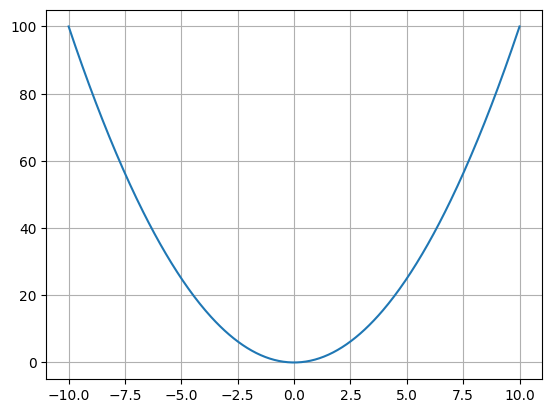

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 400)
y = f(x)

plt.plot(x, y)
plt.grid()
plt.show()

Ustal punkt startowy $x_0$ oraz współczynnik uczenia $\eta>0$. Wykonaj kilka iteracji algorytmu gradientu prostego i narysuj na wykresie funkcji kolejno uzyskiwane punkty $x_n$. Punkty połącz linią pokazującą ścieżkę optymalizacji. Pochodną obliczaj numerycznie stosując wzór:

\begin{equation*}
f'(x) \approx \frac{f(x+h) - f(x)}{h},
\end{equation*}

gdzie $h$ to liczba bliska zeru (np. $h=10^{-9}$).

In [69]:
def df(x, h=1e-9):
  return (f(x+h) - f(x))/h

In [63]:
n= .4
x0= 10
steps = 4
tabela = [x0]

for i in range(steps):
  x0 = x0 - n*df(x0)
  tabela.append(x0)

print(tabela)

[10, 1.999999338077032, 0.39999973859949023, 0.07999993416717643, 0.015999986464612093]


Napisz kod, który automatycznie wykona powyższe kroki.  

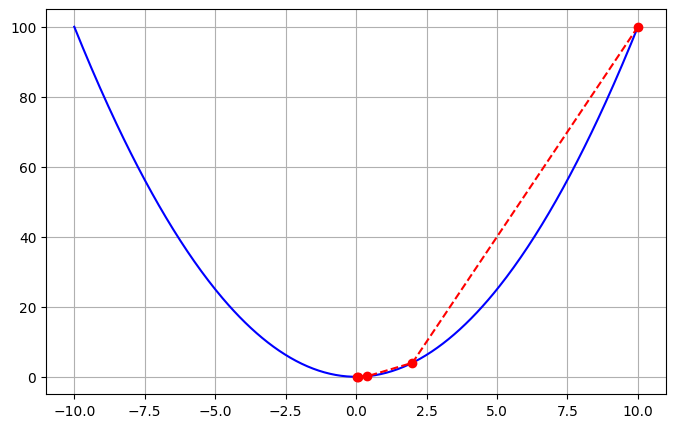

In [64]:
x = np.linspace(-10, 10, 400)
y = f(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y, color='blue')
plt.scatter(tabela, [f(x) for x in tabela], color="red", zorder=5)
plt.plot(tabela, [f(x) for x in tabela], 'r--', label="Kroki gradientu")
plt.grid()
plt.show()

### 1.3.2 Wnioski

Przeprowadź różne eksperymenty zmieniając funkcję, punkt startowy oraz współczynnik uczenia. Odpowiedz na pytania:

1. co się dzieje, gdy współczynnik uczenia jest zbyt duży?
2. co się dzieje, gdy współczynnik uczenia jest zbyt mały?
3. jak ostateczny wynik algorytmu zależy od wyboru punktu startowego?

## 1.4 Przypadek funkcji dwóch zmiennych

Załóżmy teraz, że $z=f(x,y)$ jest funkcją dwóch zmiennych $x$ i $y$. Oto postać algorytmu dla tego przypadku:

1. Ustalamy parametry algorytmu:
   * $(x_0, y_0)$ - punkt startowy (dowolny),
   * $\eta>0$ - współczynnik uczenia (dowolny, ale nie za duży),
2. Obliczamy kolejne punkty $(x_1,y_1), (x_2,y_2),\ldots$ w następujący sposób:

    \begin{gather*}
    x_{n+1} = x_n - \eta \cdot \frac{\partial f}{\partial x}(x_n, y_n) \\
    y_{n+1} = y_n - \eta \cdot \frac{\partial f}{\partial y}(x_n, y_n)
    \end{gather*}

3. Proces kończymy, gdy osiągniemy zbieżność, czyli gdy różnice między kolejnymi punktami staną się zaniedbywalnie małe, lub gdy osiągniemy maksymalną liczbę iteracji.
4. Zwracamy ostatni punkt $(x_n, y_n)$ jako przybliżenie minimum lokalnego funkcji $f$.

### 1.4.1 Przykład dla wybranej funkcji dwóch zmiennych

Na początek wybierz jakąś prostą dobrze znaną funkcję, np. $f(x,y) = x^2 + y^2$ lub $f(x,y) = (x-1)^2 + 10(y+2)^2$. Możesz też wypróbować coś o bardziej wyszukanym zachowaniu, np. funkcję Rosenbrocka

\begin{equation*}
f(x,y) = (1-x)^2 + 100(y-x^2)^2
\end{equation*}

czy funkcję Himmelblaua

\begin{equation*}
f(x,y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2
\end{equation*}

Zdefiniuj swoją funkcję w Pythonie.

In [52]:
def f2(x, y):
  return x**2 + y**2

8

Narysuj wykres 3D funkcji oraz wykres konturowy (widok z góry) na jakimś wybranym obszarze zawierającym przynajmniej jedno minimum lokalne.

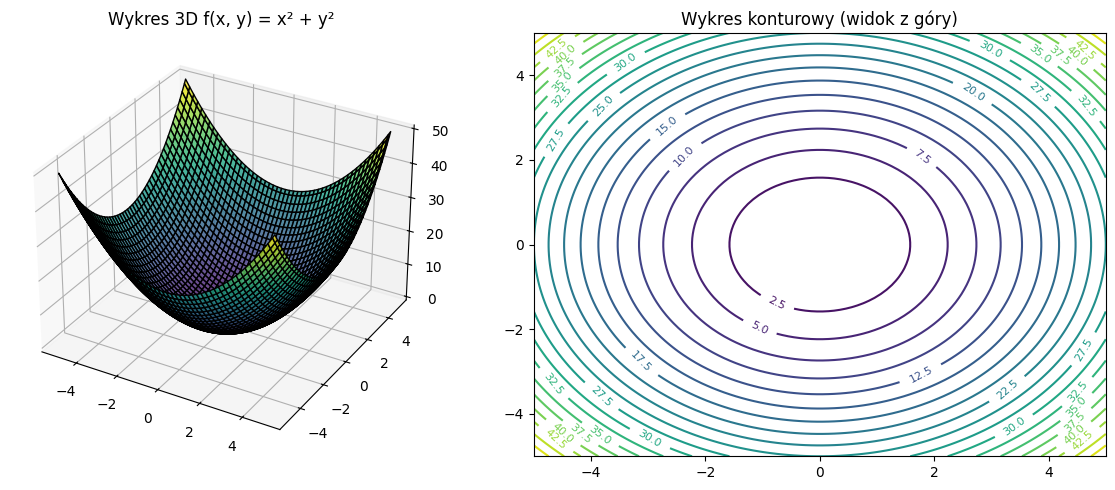

In [60]:
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f2(X, Y)

fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.8)
ax1.set_title("Wykres 3D f(x, y) = x² + y²")

ax2 = fig.add_subplot(1, 2, 2)
contours = ax2.contour(X, Y, Z, 20, cmap='viridis')  # 20 poziomów
ax2.clabel(contours, inline=True, fontsize=8)
ax2.set_title("Wykres konturowy (widok z góry)")

plt.tight_layout()
plt.show()

Ustal punkt startowy $(x_0, y_0)$ oraz współczynnik uczenia $\eta>0$. Wykonaj kilka iteracji algorytmu gradientu prostego i narysuj na mapie konturowej kolejno uzyskiwane punkty $(x_n, y_n)$ połączone linią pokazującą ścieżkę optymalizacji.

Pochodne cząstkowe obliczaj numerycznie stosując wzory:

\begin{equation*}
\frac{\partial f}{\partial x}(x,y) \approx \frac{f(x+h, y) - f(x, y)}{h}
\end{equation*}

\begin{equation*}
\frac{\partial f}{\partial y}(x,y) \approx \frac{f(x, y+h) - f(x, y)}{h}
\end{equation*}

gdzie $h$ to liczba bliska zeru (np. $h=10^{-9}$).

In [70]:
def df2(x, y, h=1e-5):
    df_dx = (f2(x + h, y) - f2(x, y)) / h
    df_dy = (f2(x, y + h) - f2(x, y)) / h
    return np.array([df_dx, df_dy])

array([4.00001, 4.00001])

Napisz kod, który automatycznie wykona powyższe kroki z kryterium zatrzymania opartym na zbieżności.

In [83]:
n2 = .35
xy0 = np.array([10,10])
steps2 = 5
tablica2 = [xy0.copy()]

for i in range(steps2):
  xy0 = xy0 - n2*df2(xy0[0], xy0[1])
  tablica2.append(xy0)

print(tablica2)

[array([10, 10]), array([2.9999965, 2.9999965]), array([0.89999545, 0.89999545]), array([0.26999514, 0.26999514]), array([0.08099504, 0.08099504]), array([0.02429501, 0.02429501])]


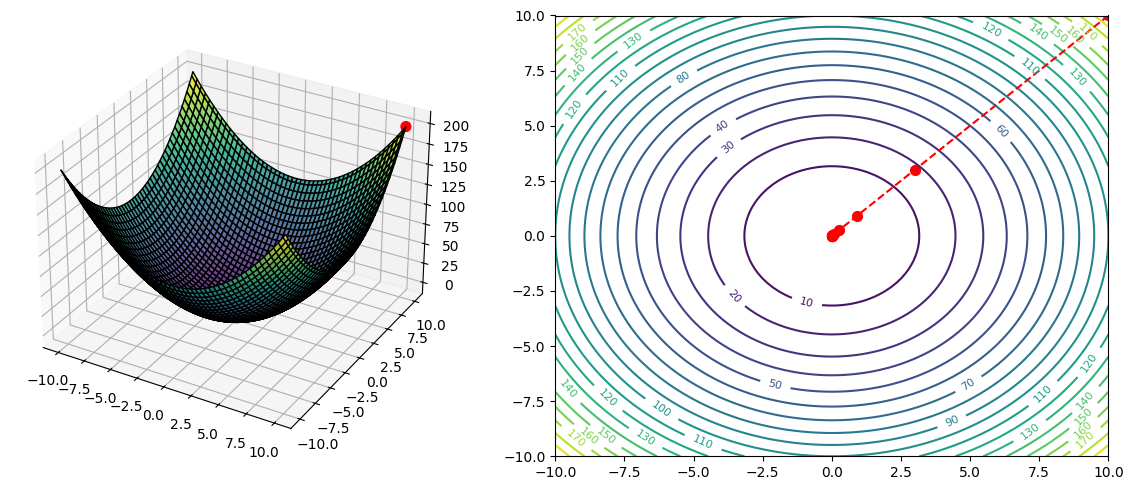

In [82]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = f2(X, Y)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.8)
tablica2_array = np.array(tablica2)
Z_points = [f2(x, y) + 0.1 for x, y in tablica2_array]
ax1.scatter(tablica2_array[:,0], tablica2_array[:,1],
            [f2(x,y) for x,y in tablica2_array], Z_points, color='red', s=50)
ax1.plot(tablica2_array[:,0], tablica2_array[:,1],
         [f2(x,y) for x,y in tablica2_array], 'r--')

ax2 = fig.add_subplot(1, 2, 2)
contours = ax2.contour(X, Y, Z, 20, cmap='viridis')
ax2.clabel(contours, inline=True, fontsize=8)

ax2.scatter(tablica2_array[:,0], tablica2_array[:,1], color='red', s=50)
ax2.plot(tablica2_array[:,0], tablica2_array[:,1], 'r--')


plt.tight_layout()
plt.show()

### 1.4.2 Wnioski

Przeprowadź różne eksperymenty zmieniając funkcję, punkt startowy oraz współczynnik uczenia. Odpowiedz na pytania:

1. Co się dzieje, gdy współczynnik uczenia jest zbyt duży?
2. Co się dzieje, gdy współczynnik uczenia jest zbyt mały?
3. Jak ostateczny wynik algorytmu zależy od wyboru punktu startowego?
4. Jak zachowuje się algorytm dla różnych funkcji (np. funkcja Rosenbrocka vs. prosta parabola)?
5. Czy algorytm zawsze znajduje globalne minimum?